In [1]:
# Notebook to study esmeralda 
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re
from collections import Counter

%matplotlib inline

In [2]:
# Load in the dataframe

events = pd.read_hdf("../data/NEW_Data_Tl208_Esmeralda/cdst_7746_v1.2.0_trigger2_bg.h5", '/CHITS/highTh')

metadata = pd.read_hdf("../data/NEW_Data_Tl208_Esmeralda/cdst_7746_v1.2.0_trigger2_bg.h5", '/Summary/Events')
display(metadata)

,event,evt_energy,evt_charge,evt_ntrks,evt_nhits,evt_x_avg,evt_y_avg,evt_z_avg,evt_r_avg,evt_x_min,evt_y_min,evt_z_min,evt_r_min,evt_x_max,evt_y_max,evt_z_max,evt_r_max,evt_out_of_map
0,1,0.238376,-1.0,1,37,-23.635473,-46.033134,335.425398,52.234989,-35.0,-65.0,332.778185,38.078866,-5.0,-35.0,339.687220,69.641941,False
1,7,0.335598,-1.0,1,36,-135.649480,-27.828993,155.537656,138.684092,-155.0,-45.0,152.674953,125.896783,-125.0,-15.0,157.736506,157.003185,False
2,20,0.449683,-1.0,1,58,11.388019,168.250244,244.763036,168.786497,-5.0,155.0,238.861932,155.080624,25.0,185.0,249.482353,186.681547,False
3,21,0.231753,-1.0,1,30,-47.572942,-2.542974,332.936846,48.134566,-65.0,-15.0,329.015076,35.355339,-35.0,15.0,335.901912,65.192024,False
4,28,NaN,-1.0,1,190,NaN,NaN,NaN,NaN,-205.0,-5.0,269.224555,105.118980,-105.0,55.0,334.883022,206.518764,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603817,2284797,0.283948,-1.0,1,34,-155.049400,-9.927948,145.819564,155.637380,-165.0,-25.0,142.901947,125.896783,-125.0,15.0,149.797537,166.883193,False
603818,2284801,0.231736,-1.0,1,29,-178.350162,-11.949008,189.773068,178.904046,-195.0,-25.0,187.480632,165.075740,-165.0,5.0,192.666857,195.576072,False
603819,2284809,0.219694,-1.0,1,28,26.430435,-24.647585,173.564698,36.700805,15.0,-35.0,170.625400,21.213203,35.0,-15.0,177.583412,49.497475,False
603820,2284819,0.234677,-1.0,1,21,-47.938171,-134.719409,3.150993,143.137911,-65.0,-145.0,0.637779,129.807550,-35.0,-125.0,5.095997,155.080624,False


In [9]:
# Loop over and get high energy events

high_e_events = metadata[metadata.evt_energy > 1].event.values
print(high_e_events)

events_high_e = events[events.event.isin(high_e_events)]
display(events_high_e)


# event = events[events.event == high_e_events[0]]
# display(event)

[     93     153     172 ... 2284671 2286050 2284791]


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
899,93,1.578221e+09,0,37.461837,39.711467,1,25.0,5.0,0.0,0.0,170.780740,42.499352,3207.684653,-1.0,0.012066,0,0.012066
900,93,1.578221e+09,0,37.461837,39.711467,1,25.0,5.0,0.0,0.0,172.503550,59.693745,1907.246992,-1.0,0.007175,0,0.007175
901,93,1.578221e+09,0,37.461837,39.711467,1,35.0,5.0,0.0,0.0,172.503550,55.115417,1760.966996,-1.0,0.006684,0,0.006684
902,93,1.578221e+09,0,37.461837,39.711467,1,25.0,-5.0,0.0,0.0,172.503550,30.989145,990.119726,-1.0,0.003740,0,0.003740
903,93,1.578221e+09,0,37.461837,39.711467,1,35.0,5.0,0.0,0.0,174.416373,93.365868,2971.743783,-1.0,0.011281,0,0.011281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33901523,2284791,1.578297e+09,0,3.428087,65.330532,1,25.0,75.0,0.0,0.0,325.112076,62.049259,2363.445981,-1.0,0.009327,0,0.009327
33901524,2284791,1.578297e+09,0,3.428087,65.330532,1,25.0,75.0,0.0,0.0,326.886323,38.372566,2445.563335,-1.0,0.009653,0,0.009653
33901525,2284791,1.578297e+09,0,3.428087,65.330532,1,25.0,75.0,0.0,0.0,341.622643,30.861341,695.526700,-1.0,0.002749,0,0.002749
33901526,2284791,1.578297e+09,0,3.428087,65.330532,1,25.0,75.0,0.0,0.0,343.375892,45.666077,1046.890626,-1.0,0.004139,0,0.004139


1.642601825711369


<Figure size 432x288 with 0 Axes>

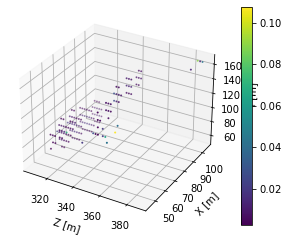

In [28]:
event = events_high_e[events_high_e.event ==  high_e_events[20]]

print(event.Ec.sum())

plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Z [m]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')


fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('white')  # Set the background color to white

p = ax.scatter(event.Z,event.X,event.Y,cmap='viridis',c=event.Ec, s=1, zorder=2) #coolwarm
cb = fig.colorbar(p, ax=ax)
# cb.set_label('Energy [keV]')
# ax.set_title(f"Event: {evt}")